In [1]:
import tensorflow as tf
import numpy as np

import cv2
import IPython.display as display
import PIL.Image

from tensorflow import keras

%load_ext autoreload
%autoreload 2

## Optimize activations

In [2]:
# load model

model = keras.models.load_model(
    "/home/devel/ws.leonid/portability_test/seminars/l5_visualization/outputs/cifar10_train/cifar10_train_2022-11-01_09-29-31"
)
model.summary()

2022-11-01 09:49:00.234374: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/devel/ws.leonid/portability_test/seminars/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-01 09:49:00.234912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/devel/ws.leonid/portability_test/seminars/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-01 09:49:00.234925: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setu

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                             

In [3]:
# define optimizator
import sys

sys.path.append("../../../seminars/")
from l5_visualization.scripts.optimizators import ActivationOptimizer

ao = ActivationOptimizer(
    model=model,
    layer_name="conv2d_2",
    activation_index=(slice(None), slice(None), 0),
    steps=5000,
    step_size=0.01,
    reg_coef=0.01,
)

In [4]:
# optimize
random_image = tf.random.uniform(
    [32, 32, 3],
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None,
)

loss, image_raw = ao(random_image)
print(loss.numpy())

890.27997


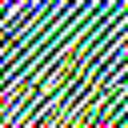

In [5]:
image = 255 * (image_raw)
image = tf.cast(image, tf.uint8)
image = np.array(image)
# resize
image = cv2.resize(image, [128, 128])
PIL.Image.fromarray(image)